Вам пропонується створити згорткову нейромережу, що використовує VGG16 в якості згорткової основи.

Навчіть отриману мережу на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Під час навчання використовуйте прийоми донавчання та виділення ознак.

Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

In [1]:
import numpy as np
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import img_to_array, array_to_img



In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

train_data_update = np.dstack([train_data] * 3)
test_data_update = np.dstack([test_data] * 3)

In [3]:
train_data_resized = [img_to_array(array_to_img(img.reshape((28, 28, 3))).resize((48, 48))) for img in train_data_update]
test_data_resized = [img_to_array(array_to_img(img.reshape((28, 28, 3))).resize((48, 48))) for img in test_data_update]


In [4]:
train_data = np.array(train_data_resized)
test_data = np.array(test_data_resized)

In [5]:
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

In [6]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
conv_base.trainable = False


58889256/58889256 [==============================] - 4s 0us/step


In [9]:
model = Sequential([
    conv_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax'),
])

In [10]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss=losses.categorical_crossentropy,
    metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 133898 (523.04 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [12]:
history = model.fit(
    train_data,
    train_labels,
    epochs=50,
    batch_size=256,
    verbose=1,
    validation_data=(test_data, test_labels),
    validation_split=0.1,
)

Epoch 1/50
235/235 [==============================] - 31s 102ms/step - loss: 0.7637 - accuracy: 0.7305 - precision: 0.8385 - recall: 0.6187 - val_loss: 0.5795 - val_accuracy: 0.7888 - val_precision: 0.8487 - val_recall: 0.7365
Epoch 2/50
235/235 [==============================] - 15s 65ms/step - loss: 0.5451 - accuracy: 0.8040 - precision: 0.8603 - recall: 0.7483 - val_loss: 0.5314 - val_accuracy: 0.8100 - val_precision: 0.8617 - val_recall: 0.7624
Epoch 3/50
235/235 [==============================] - 15s 65ms/step - loss: 0.4985 - accuracy: 0.8200 - precision: 0.8672 - recall: 0.7734 - val_loss: 0.4801 - val_accuracy: 0.8303 - val_precision: 0.8791 - val_recall: 0.7787
Epoch 4/50
235/235 [==============================] - 16s 67ms/step - loss: 0.4700 - accuracy: 0.8287 - precision: 0.8724 - recall: 0.7868 - val_loss: 0.4826 - val_accuracy: 0.8225 - val_precision: 0.8613 - val_recall: 0.7837
Epoch 5/50
235/235 [==============================] - 16s 68ms/step - loss: 0.4511 - accuracy: 

In [13]:
score = model.evaluate(test_data, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 5s 13ms/step - loss: 0.4169 - accuracy: 0.8617 - precision: 0.8777 - recall: 0.8453
Test loss: 0.41686347126960754
Test accuracy: 0.8616999983787537


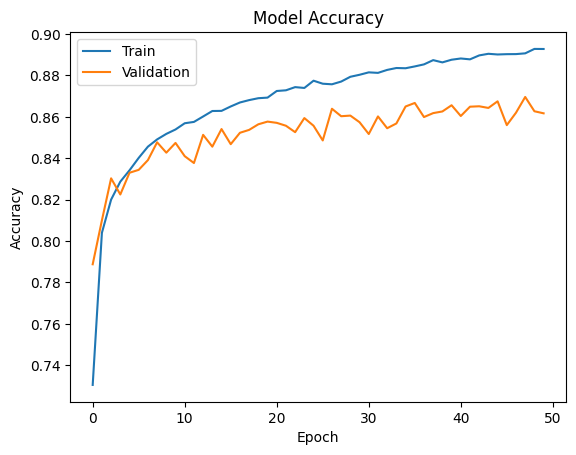

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

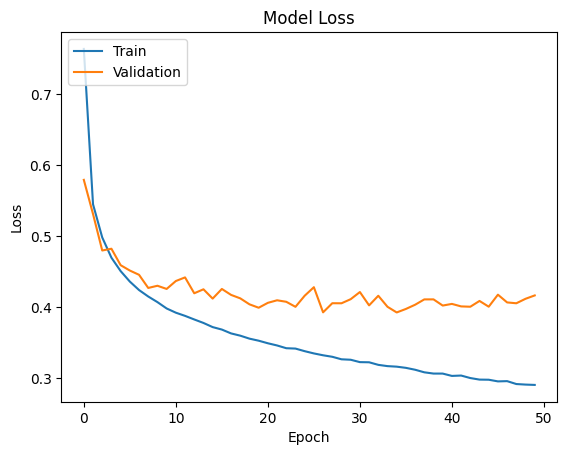

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Дообучения

In [16]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [7]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(48, 48, 3))

conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [8]:
model = Sequential([
    conv_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax'),
])

In [9]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss=losses.categorical_crossentropy,
    metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 7213322 (27.52 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [11]:
history = model.fit(
    train_data,
    train_labels,
    epochs=75,
    batch_size=750,
    verbose=1,
    validation_data=(test_data, test_labels),
    validation_split=0.1,
)

Epoch 1/75
80/80 [==============================] - 36s 261ms/step - loss: 1.7952 - accuracy: 0.3863 - precision: 0.6840 - recall: 0.2352 - val_loss: 1.9032 - val_accuracy: 0.5210 - val_precision: 0.5266 - val_recall: 0.5115
Epoch 2/75
80/80 [==============================] - 18s 222ms/step - loss: 0.7486 - accuracy: 0.7233 - precision: 0.8233 - recall: 0.6364 - val_loss: 0.6484 - val_accuracy: 0.7445 - val_precision: 0.8158 - val_recall: 0.6951
Epoch 3/75
80/80 [==============================] - 18s 224ms/step - loss: 0.5366 - accuracy: 0.8022 - precision: 0.8572 - recall: 0.7518 - val_loss: 0.4451 - val_accuracy: 0.8376 - val_precision: 0.8717 - val_recall: 0.8092
Epoch 4/75
80/80 [==============================] - 18s 227ms/step - loss: 0.4539 - accuracy: 0.8338 - precision: 0.8743 - recall: 0.7931 - val_loss: 0.4956 - val_accuracy: 0.8216 - val_precision: 0.8533 - val_recall: 0.7937
Epoch 5/75
80/80 [==============================] - 18s 224ms/step - loss: 0.4049 - accuracy: 0.8502

In [12]:
score = model.evaluate(test_data, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 6s 16ms/step - loss: 0.8750 - accuracy: 0.8886 - precision: 0.8910 - recall: 0.8873
Test loss: 0.8749980330467224
Test accuracy: 0.8885999917984009


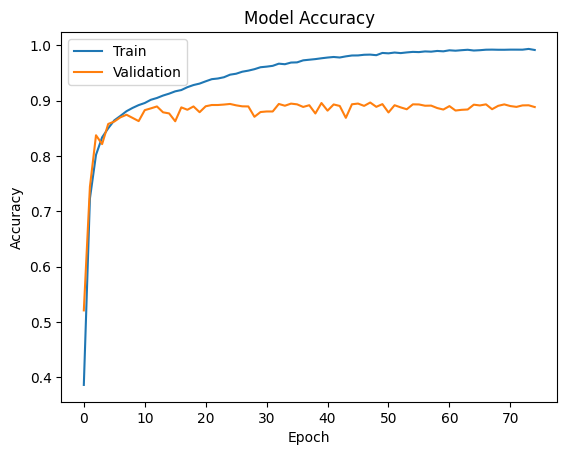

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

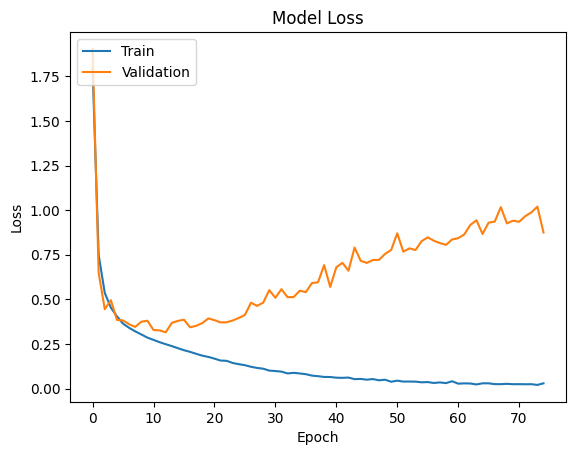

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Модель CNN демонструє вищий рівень точності як на тестових, так і на валідаційних даних, порівняно з Fully Connected Neural Network. Це свідчить про те, що використання згорткових нейронних мереж для завдань обробки зображень дозволяє досягнути кращих результатів.
Fully Connected Neural Network також досягає досить високої точності, але в порівнянні з CNN, вона виявляється менш ефективною у вирішенні завдань класифікації зображень.
Загалом, для завдань класифікації зображень, особливо на великих наборах даних, CNN є більш підходящим вибором і зазвичай дає кращі результати завдяки своїм спеціалізованим згортковим та пулінговим шарам для виявлення різних ознак в зображеннях.